#Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset


### Business Understanding


The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

For predicting red wine quality using regression, I would take the following steps as an analytical approach:

1.   Data collection and preparation: Collect red wine quality data and perform any necessary pre-processing steps such as handling missing values, outliers, and converting categorical variables into numerical ones using one-hot encoding.
2.   Exploratory Data Analysis (EDA): Perform an exploratory data analysis of the data set to gain insights into the distribution, outliers, and relationships between features and target variable.
3. Feature Engineering: Based on the insights from the EDA, engineer new features or modify existing ones to improve the model's performance.
4. Model Selection: Split the data into training and testing sets, then choose an appropriate regression model (such as Linear Regression, Random Forest Regression) by evaluating its performance on the training set.
5. Model Evaluation: Evaluate the performance of the model on the testing set and compare it with other models. Evaluate the model's performance using regression metrics such as MAE, MSE and R^2.
6. Fine-Tuning: Fine-tune the hyperparameters of the selected model using techniques such as cross-validation and grid search.
7. Model Deployment: Deploy the final model to make predictions on new, unseen data.

This approach is the right one because it covers all the necessary steps required to develop a high-performing regression model. It also allows for proper evaluation and fine-tuning of the model, which can improve its performance.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

For predicting red wine quality and determining the features that are the best indicators of quality, we will need the following data:

1. Chemical properties of the wine: This includes features such as pH, alcohol content, citric acid, residual sugar, and others. These properties directly affect the taste, aroma, and overall quality of the wine.

2. Physical properties of the wine: This includes features such as density, total sulfur dioxide, and others. These properties can influence the stability, longevity, and overall quality of the wine.

3. Sensory data: This includes the opinions of wine tasters and experts on the taste, aroma, and overall quality of the wine. These ratings can be used as the target variable for the regression model.

4. Contextual data: This includes information about the wine-making process, such as the type of grapes used, the location and climate of the vineyard, and the winemaking techniques used. This data can be used to engineer new features that may have a significant impact on the wine's quality.

It's also important to note that having a large and diverse enough data set is crucial for the success of the regression model. Having a diverse data set with a variety of wine qualities, chemical and physical properties, and contextual information can help the model learn more nuanced relationships and improve its predictions.

### Data Collection

**Q3. From where do we get our data?**

There are several sources for obtaining data for red wine quality prediction:

1. Wine competitions and tastings: Wine competitions and tastings often provide detailed information on the chemical and physical properties of the wine, as well as sensory ratings from experts.

2. Wineries and vineyards: Wineries and vineyards may have records of the chemical and physical properties of their wines, as well as information on the wine-making process.

3. Wine review websites: Wine review websites such as Wine Enthusiast, Wine Spectator, and others have a large database of wine reviews, which can be used to obtain sensory ratings.

4. Wine databases: Wine databases such as Wine.com and Vivino have a large collection of wine information, including chemical and physical properties, wine-making process, and sensory ratings.

5. Research papers: Research papers and academic journals often provide data on wine quality, including chemical and physical properties, wine-making process, and sensory ratings.

The quality of the data obtained from these sources may vary, and we should obtain data from multiple sources to ensure its accuracy and representativeness.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Samples are obtained based on physicochemical test from the north of Portugal. 

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the impact of each variable on red wine quality can help businesses in several ways:

1. Improved wine production: By understanding the key variables that affect red wine quality, producers can make informed decisions on the wine-making process, such as the type of grapes used, the location and climate of the vineyard, and the winemaking techniques used, which can improve the overall quality of the wine they produce.

2. Better pricing strategy: By understanding the impact of variables such as alcohol content, residual sugar, and others on red wine quality, producers and distributors can price their wines more accurately, which can increase their profits and help them better compete in the market.

3. Improved customer satisfaction: By understanding the impact of variables such as sensory ratings, chemical and physical properties, and wine-making process on red wine quality, businesses can produce and distribute wines that better meet the preferences and needs of their customers, which can lead to increased customer satisfaction and loyalty.

Overall, understanding the impact of each variable on red wine quality can help businesses make informed decisions, increase their competitiveness, and improve customer satisfaction, which can lead to increased profits and success.

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

## Read the dataset

In [2]:
df = pd.read_csv('/content/sample_data/winequality-red.csv')

## Exploratory Data Analysis

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


we can see that there is lot of difference between 75 percentile and the max valuues indicating the presence of outliers and uneven distribution

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Check for null values

In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## Data visualization


#### count of samples for each quality of wine

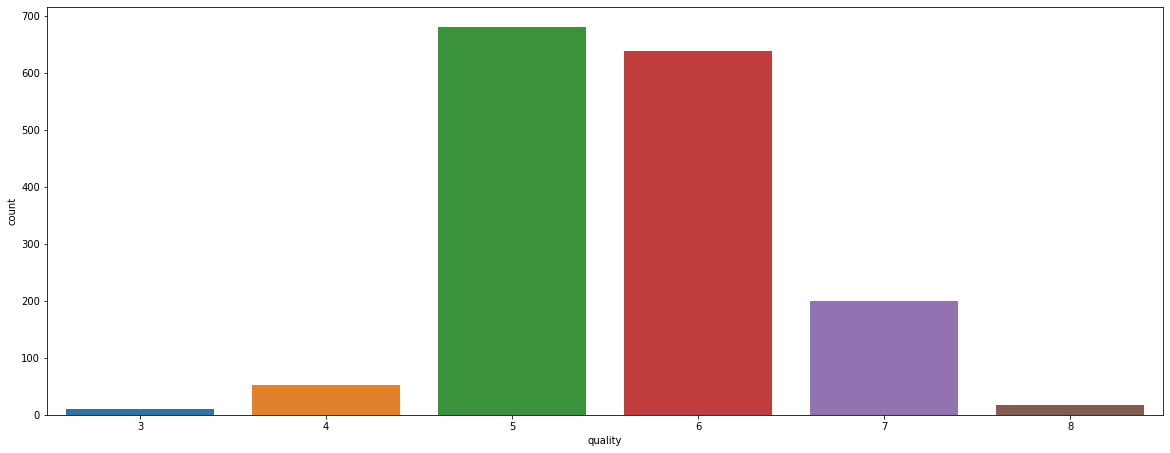

In [10]:
plt.figure(figsize=(20,7.5))
sns.countplot(data=df, x="quality")

#### Histograms 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


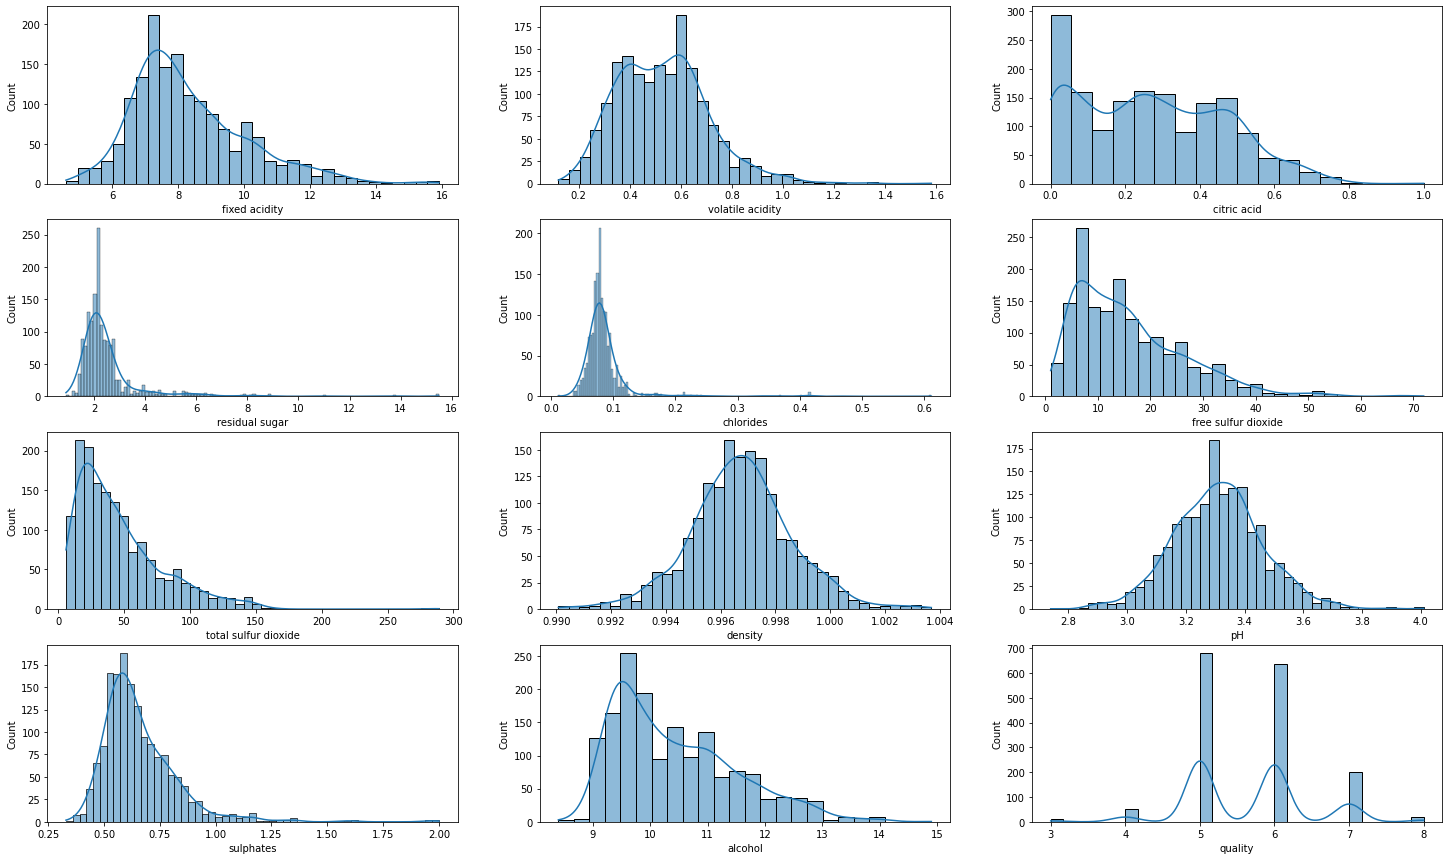

In [11]:
max_rows = 4
max_cols = 3
figs, axes = plt.subplots(max_rows, max_cols, figsize=(25,15))
cols = df.columns
print(cols)
for i in range(0,max_rows):
  for j in range(0,max_cols):
    count =  (i*max_cols) + j
    # if(count< len(cols)):
    col = cols[count]
    sns.histplot(ax = axes[i,j], data=df, x=col, kde=True)

plt.show()

Based on above figures it shows that a lot of features have skewed data

#### Heat map

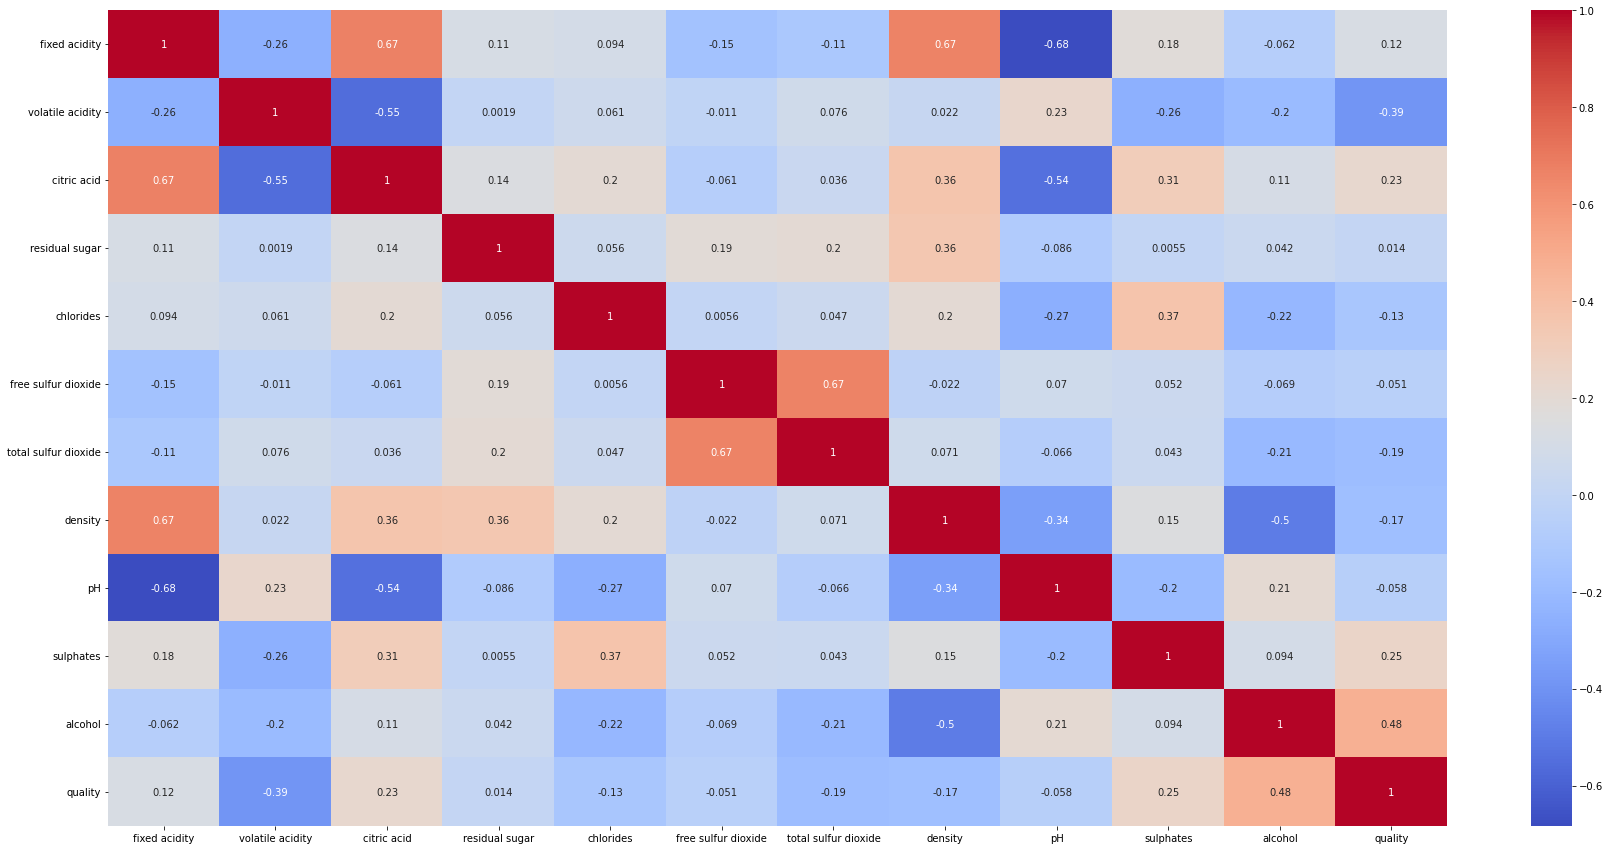

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm")

1. density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
2. pH & fixed acidity has negative correlation.
3. density & fixed acidity has positive correlation.
4. citric acid & fixed acidity has positive correlation.
5 .citric acid & volatile acidity has negative correlation.
6. free sulphur dioxide & total sulphur dioxide has positive correlation.

#### Outliers

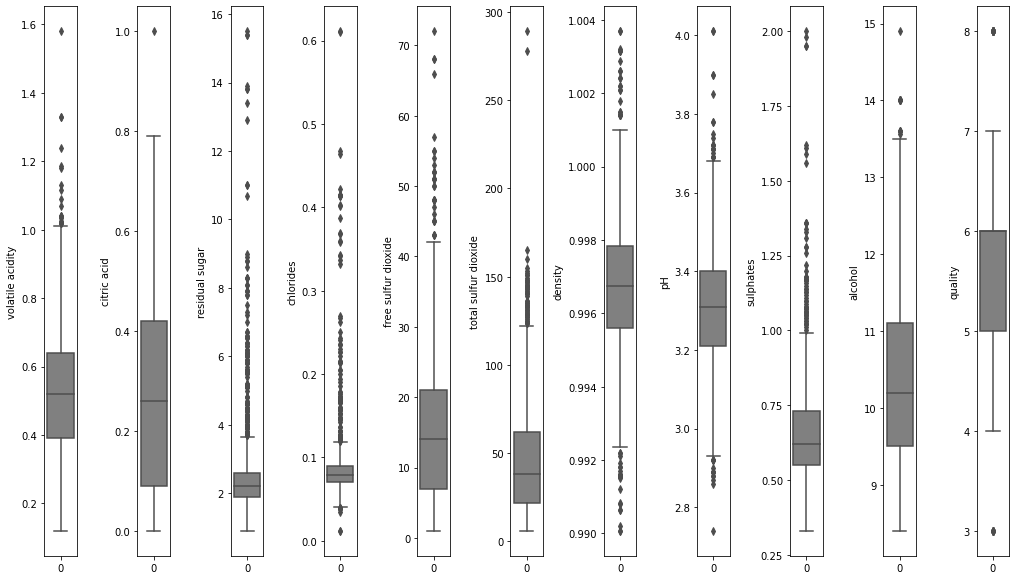

In [13]:
collist=df.columns.values
ncol=12
nrows=5
plt.figure(figsize=(15,40))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]], color='gray', orient='v')
    plt.tight_layout()
    plt.ylabel(collist[i])

we can see that there are a lot of outliers.  `residual sugar` , `chlorides` and `sulphates` have the most number of outliers. <br>
outliers are determined by visualizing the points above and below the whisker line (straight line above and below each box plot)

##### removing outliers

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df))
og = df.shape
print('before removing outliers', og)
df = df[(z<3).all(axis=1)]
new = df.shape
print('after removing outliers', new)

print(f"removed {og[0] - new[0]} rows and {og[1] - new[1]} columns")

before removing outliers (1599, 12)
after removing outliers (1451, 12)
removed 148 rows and 0 columns


using the z score for removing outliers. <br>
Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score.

## Data splitting

In [15]:
features = df[df.columns.drop('quality')].values
label = df['quality'].values
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1160, 11)
(1160,)
(291, 11)
(291,)


In [33]:
x_train

array([[1.24e+01, 4.00e-01, 5.10e-01, ..., 3.04e+00, 6.00e-01, 9.30e+00],
       [7.50e+00, 4.90e-01, 1.90e-01, ..., 3.39e+00, 5.40e-01, 9.70e+00],
       [7.70e+00, 7.05e-01, 1.00e-01, ..., 3.39e+00, 4.90e-01, 9.70e+00],
       ...,
       [6.10e+00, 5.90e-01, 1.00e-02, ..., 3.52e+00, 5.60e-01, 1.14e+01],
       [7.60e+00, 6.85e-01, 2.30e-01, ..., 3.21e+00, 6.10e-01, 9.30e+00],
       [7.10e+00, 5.90e-01, 2.00e-02, ..., 3.55e+00, 5.30e-01, 9.70e+00]])

## Scaling data

In [34]:
#  Scaling
ss = StandardScaler()
x_train = ss.fit_transform(x_train, y_train)
x_test = ss.fit_transform(x_test, y_test)

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform">Scikit learn documentation about Standard Scaler</a>

## Modeling

### Model 1: Linear Regression

In [35]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

#### Predictions  

In [36]:
y_pred = reg.predict(x_test)

In [37]:
pred_df = pd.DataFrame({'Actual': y_test,'Predictions': y_pred})
pred_df['Predictions'] = round(pred_df['Predictions'], 2)
pred_df.head()


,Actual,Predictions
0,6,6.30
1,6,5.99
2,6,6.34
3,6,5.37
4,7,5.85


#### Display the distribution of predicted values

<Figure size 2160x720 with 0 Axes>

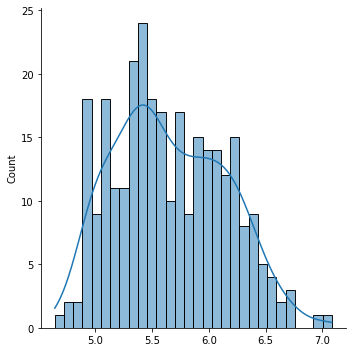

In [38]:
plt.figure(figsize=(30,10))
sns.displot((y_pred),bins=30, kde=True)

#### Actual vs Predicted values

Text(0, 0.5, 'Predicted')

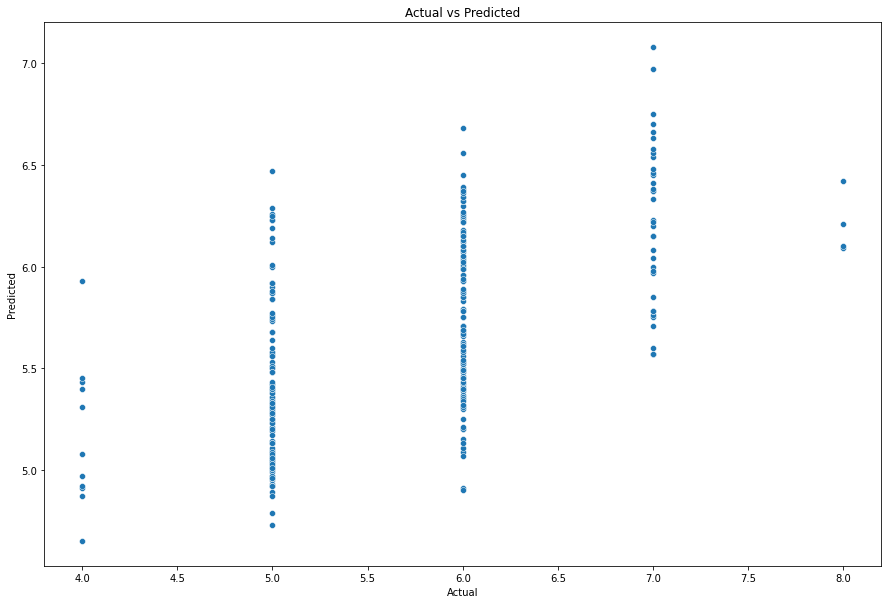

In [39]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=pred_df, x='Actual', y='Predictions')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#### Metrics calculation

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2', metrics.r2_score(y_test, y_pred ))

MAE: 0.49418828914839263
MSE: 0.41237373106791936
RMSE: 0.6421633211792148
R2 0.3465283146719099


### Model 2: Random Forest Regressor

#### Hyperparameter tuning

In [41]:
def analyze_results(result):
  means = result.cv_results_['mean_test_score']
  stds = result.cv_results_['std_test_score']
  params = result.cv_results_['params']
  for mean, std, param in zip(means, stds, params):
    print(f"{mean} +/-{std} for {param} ")

rf =  RandomForestRegressor()
params = {
    "n_estimators" : [1, 5, 10, 20, 50, 100],
    "max_depth": [1, 2, 5, 10, 20, 50, None]
}
cv = GridSearchCV(rf, params, cv=5)
cv.fit(x_train, y_train)
analyze_results(cv)

print('best', cv.best_estimator_, cv.best_score_, cv.best_params_)

0.14808043298175674 +/-0.0186434315929803 for {'max_depth': 1, 'n_estimators': 1} 
0.19684750390820677 +/-0.026746844958454898 for {'max_depth': 1, 'n_estimators': 5} 
0.21040124532683951 +/-0.024759083799507715 for {'max_depth': 1, 'n_estimators': 10} 
0.21076421009893603 +/-0.022958436187711376 for {'max_depth': 1, 'n_estimators': 20} 
0.2223956973337023 +/-0.028346496486053162 for {'max_depth': 1, 'n_estimators': 50} 
0.21409281945748596 +/-0.024765893958224247 for {'max_depth': 1, 'n_estimators': 100} 
0.21271155215241527 +/-0.03831790545756233 for {'max_depth': 2, 'n_estimators': 1} 
0.3021200433955 +/-0.04454620994534266 for {'max_depth': 2, 'n_estimators': 5} 
0.30893837659815987 +/-0.005962013723187737 for {'max_depth': 2, 'n_estimators': 10} 
0.30784909008022127 +/-0.010930669705413919 for {'max_depth': 2, 'n_estimators': 20} 
0.3072720342316068 +/-0.0108616802471443 for {'max_depth': 2, 'n_estimators': 50} 
0.3119834203065871 +/-0.006454162097644649 for {'max_depth': 2, 'n_es

#### Model fitting 

In [42]:
rfr = RandomForestRegressor(max_depth=None, n_estimators=50, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

#### Predictions

In [43]:
y_pred_rfr = rfr.predict(x_test)
pred_df_rfr = pd.DataFrame({'Actual': y_test,'Predictions': y_pred_rfr})
pred_df_rfr['Predictions'] = round(pred_df_rfr['Predictions'], 2)
pred_df_rfr.head()


,Actual,Predictions
0,6,6.26
1,6,6.24
2,6,5.96
3,6,5.66
4,7,6.20


#### Display distribution of predicted values

<Figure size 2160x720 with 0 Axes>

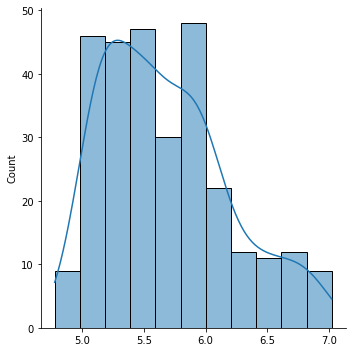

In [44]:
plt.figure(figsize=(30,10))
sns.displot((y_pred_rfr), kde=True)

#### Actual vs Predicted

Text(0, 0.5, 'Predicted')

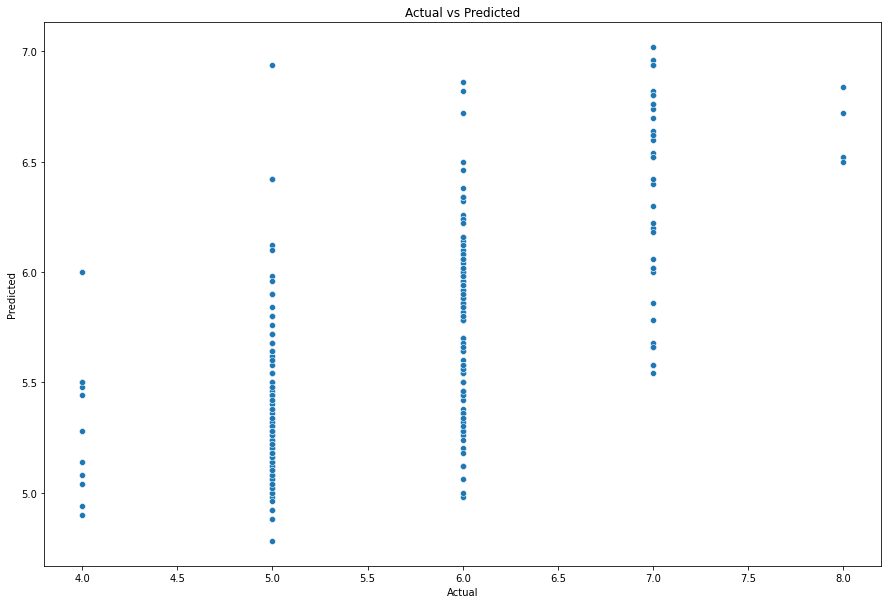

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=pred_df_rfr, x='Actual', y='Predictions')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#### Metrics calculation

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('R2', metrics.r2_score(y_test, y_pred_rfr ))

MAE: 0.4345704467353952
MSE: 0.3423903780068729
RMSE: 0.5851413316514847
R2 0.457428054942176


## Feature importance and Visualization

In [28]:
importance = reg.coef_
arr = []
for i,v in enumerate(importance):
  arr.append([df.columns[i], round(v,2)])

In [29]:
df_feat = pd.DataFrame(arr, columns=["feature", "importance"])
df_feat.sort_values(by='importance', inplace=True, ascending=True)
df_feat

,feature,importance
7,density,-6.44
1,volatile acidity,-0.73
8,pH,-0.61
4,chlorides,-0.33
2,citric acid,-0.15
3,residual sugar,-0.02
5,free sulfur dioxide,0.00
6,total sulfur dioxide,-0.00
0,fixed acidity,0.02
10,alcohol,0.30


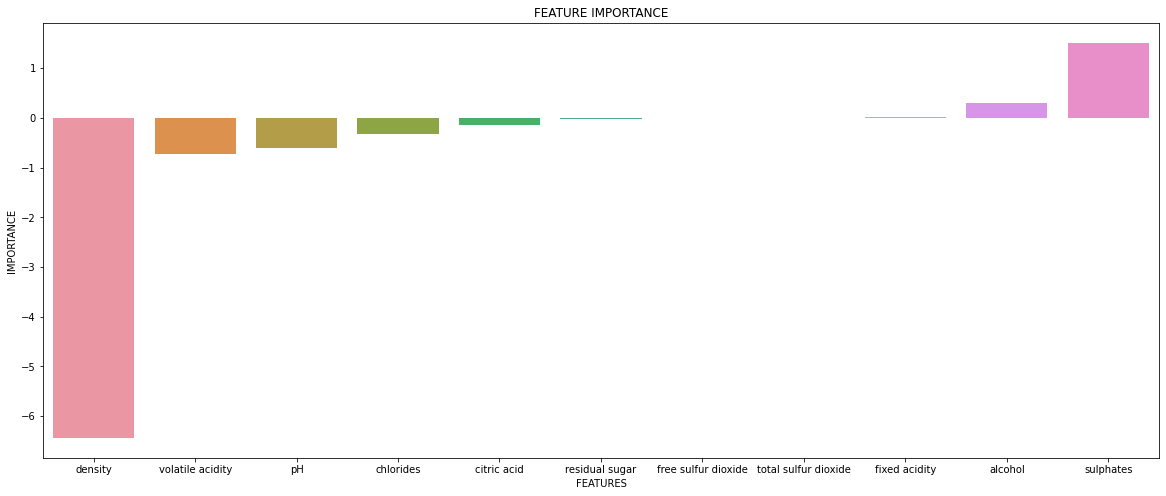

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x="feature", y="importance", data=df_feat)
plt.title("FEATURE IMPORTANCE")
plt.xlabel("FEATURES")
plt.ylabel("IMPORTANCE")
print()

In the above figure, the least significant features have been marked as 0.

## Conclusion

It is observed High level of alcohol and sulphates indicates a good quality wine

We saw that the dataset has skewed features and many many outliers. Some effort is taken to remove the outliers and scale the data but the data is still far from normal.

One limitation of the analysis is that we did not derive any new features using feature engineering. <br>
Future work would include doing better feature engineering and trying to derive new features and/or dropping certain features to make the model's performance better <br>
Future work would also include an effort to make the data normalized. <br><br>

In terms of performance, it is observed that Random Forest did a better job than Linear Regression but the model's score is low. 